**ENSF 611 - Final Project**  

**Team Members:**  
Destin Saba: 30249241  
Nathan de Oliveira: 30113724  
Rana El Sadig: 30240327


# Table of Contents

1. [Introduction](#Introduction)
2. [Dataset Loading and Initial Exploration](#Dataset-Loading-and-Initial-Exploration)
   - 2.1 [Load Dataset](#Load-Dataset)
   - 2.2 [Initial Data Examination](#Initial-Data-Examination)
3. [Data Preprocessing](#Data-Preprocessing)
   - 3.1 [Encode Target Variable](#Encode-Target-Variable)
   - 3.2 [Feature Selection](#Feature-Selection)
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
   - 4.1 [Class Distribution Visualization](#Class-Distribution-Visualization)
   - 4.2 [Alpha vs. Delta Plot](#Alpha-vs-Delta-Plot)
   - 4.3 [Feature Correlation Matrix](#Feature-Correlation-Matrix)
5. [Data Splitting](#Data-Splitting)
6. [Model Training and Hyperparameter Tuning](#Model-Training-and-Hyperparameter-Tuning)
   - 6.1 [Pipeline and Parameter Grid](#Pipeline-and-Parameter-Grid)
7. [Best Model Evaluation](#Best-Model-Evaluation)
   - 7.1 [Best Parameters and Cross-Validation Scores](#Best-Parameters-and-Cross-Validation-Scores)
   - 7.2 [Precision, Recall, and F1 Score](#Precision-Recall-and-F1-Score)
   - 7.3 [Confusion Matrix](#Confusion-Matrix)
   - 7.4 [ROC and AUC](#ROC-and-AUC)

# Introduction

In this machine learning project for ENSF 611, we aim to classify celestial objects—specifically **stars**, **galaxies**, and **quasars**—using the **Stellar Classification Dataset** from the Sloan Digital Sky Survey (SDSS), available on [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/data). Stellar classification is essential in astronomy, helping scientists categorize objects based on their spectral data and revealing insights into the structure of our galaxy and others.

This dataset consists of **100,000 observations**, each represented by **17 feature columns** and a **target column** (`class`) identifying the object type. The features capture various astronomical measurements, including spatial coordinates, photometric data, and identifiers used in SDSS’s observational catalog. Below is a brief description of each feature:

- **obj_ID**: Unique identifier for each object in the catalog.
- **alpha**: Right Ascension angle (J2000 epoch), measuring the object’s angular distance eastward along the celestial equator.
- **delta**: Declination angle (J2000 epoch), indicating the angular distance north or south of the celestial equator.
- **u, g, r, i, z**: Photometric data captured through five filters—ultraviolet (u), green (g), red (r), near-infrared (i), and infrared (z)—to analyze the object's spectral characteristics.
- **run_ID**: Scan identifier for specific SDSS observations.
- **rerun_ID**: Processing rerun identifier.
- **cam_col**: Camera column, identifying the scanline within a particular run.
- **field_ID**: Field identifier for each observation scan.
- **spec_obj_ID**: Unique identifier for each spectroscopic observation, meaning objects with the same `spec_obj_ID` share the same classification.
- **class**: The target variable, categorizing each object as either a **galaxy**, **star**, or **quasar**.
- **redshift**: Measure of the object's redshift, indicating its distance and the universe's expansion effects on its wavelength.
- **plate**: ID for the SDSS observation plate.
- **MJD**: Modified Julian Date, recording when each observation was made.
- **fiber_ID**: Identifier for the fiber pointing light at the SDSS focal plane during each observation.

Our project involves several stages:
1. **Data Preprocessing**: Handle missing values, label encoding, and feature scaling.
2. **Exploratory Data Analysis (EDA)**: Analyze the dataset’s structure and visualize key attributes.
3. **Model Training**: Train and fine-tune several classification models using cross-validation and hyperparameter tuning.
4. **Evaluation**: Assess model performance using accuracy, precision, recall, and AUC.

Our objective is to develop a model that accurately classifies each observation, contributing to automated astronomical categorization.

In [37]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

# Dataset Loading and Initial Exploration

### Load Dataset

In [38]:
# Load the data
stars = pd.read_csv('star_classification.csv')

### Initial Data Examination

In [39]:
# Examine first few rows
stars.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [40]:
# Get info on columns and nulls
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

There are no null values, and the only categorical data is the target vector (class).

# Data Preprocessing

### Encode Target Variable

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
stars["class"] = labelencoder.fit_transform(stars["class"])
stars["class"].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

### Feature Selection

We will drop ID columns that do not provide useful information.

In [42]:
stars = stars.drop(columns=['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID','fiber_ID'])

# Exploratory Data Analysis (EDA)

### Class Distribution Visualization

In this step, we visualize the distribution of each class (star, galaxy, and quasar) within our dataset. This plot allows us to assess the balance between the classes and understand the prevalence of each type of celestial object. Having a balanced class distribution is important for training a machine learning model because imbalances can lead to biased predictions.

In [43]:
space_colors = ["#1f1b4f", "#3b4cca", "#6d5acf", "#f3e9a7", "#f4b942", "#d9935d"]

<Axes: xlabel='class', ylabel='count'>

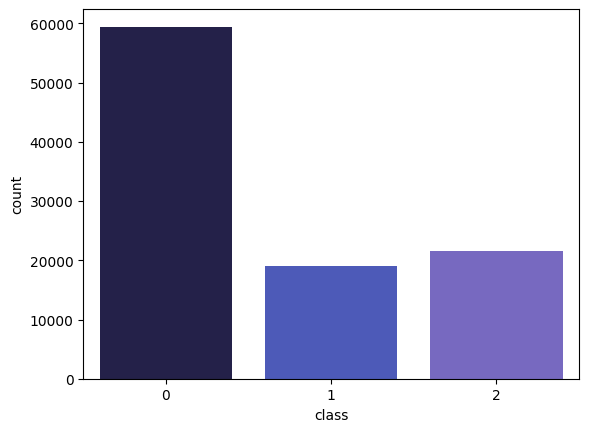

In [44]:
# Confirm possible classes by plotting distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=stars, x='class', palette=space_colors)

The class distribution plot reveals that the dataset is slightly imbalanced. Galaxies make up a larger proportion of the data compared to quasars and stars. This imbalance may impact model performance, particularly for the minority class (quasars). In later steps, we may consider techniques to address any significant class imbalance, such as stratifying, depending on model performance.

### Alpha vs. Delta Plot

This plot visualizes the spatial distribution of celestial objects using their Right Ascension (Alpha) and Declination (Delta) coordinates. Right Ascension and Declination are astronomical coordinates that locate objects in the sky. By plotting Alpha on the x-axis and Delta on the y-axis, we can observe the relative positions of stars, galaxies, and quasars and potentially identify any spatial clustering or patterns among the classes.

<Axes: xlabel='alpha', ylabel='delta'>

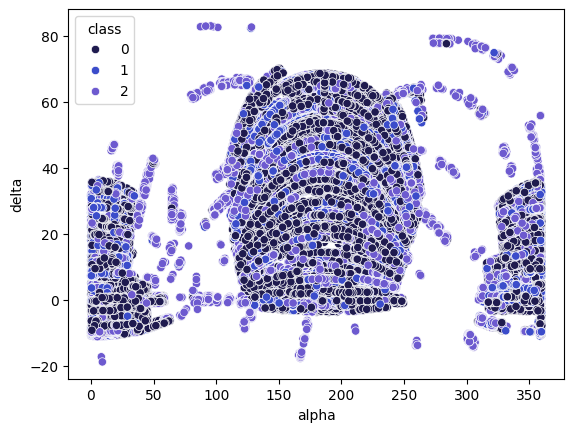

In [45]:
# Plot alpha  vs. delta
sns.scatterplot(data=stars, x='alpha', y='delta', hue='class', palette=space_colors)

The Alpha vs. Delta plot reveals that celestial objects are spread unevenly across the sky. Galaxies (black) and quasars (darker blue) appear more concentrated in certain regions, while stars (lighter blue) show a more dispersed pattern. The denser clustering of galaxies and quasars may be due to specific observational efforts in those areas or actual physical clustering in space. In contrast, stars have a wider distribution, suggesting they were observed across broader regions. This spatial insight provides useful context for the dataset, although it is not directly used in model training.

### Feature Correlation Matrix

In this step, we examine the correlation between features using a correlation matrix. By visualizing this matrix, we can identify features that are strongly correlated with each other or with the target variable. High correlations between features may indicate redundancy, which could affect model performance.

<Axes: >

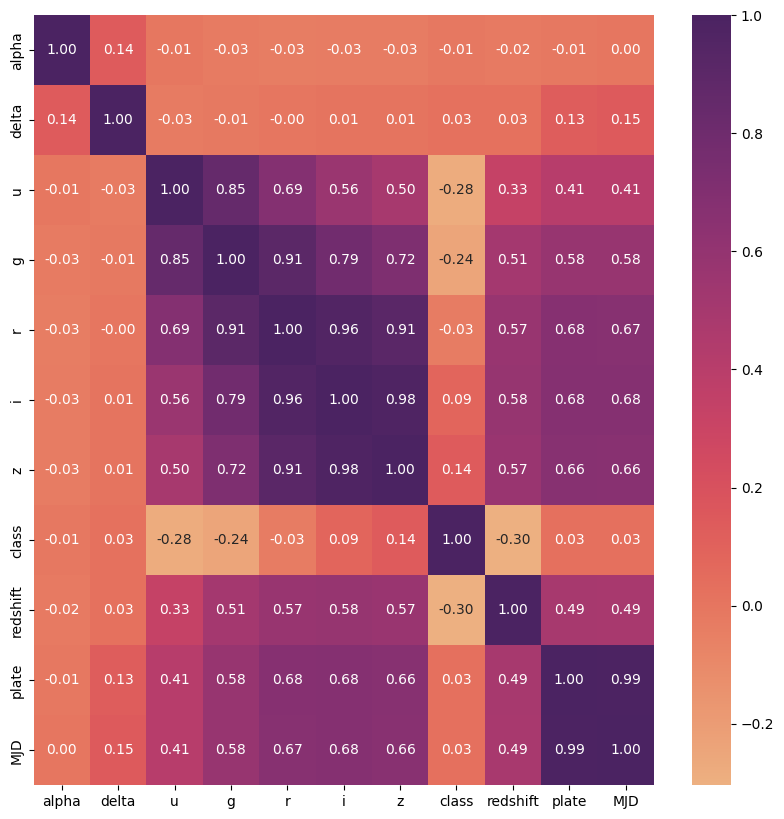

In [46]:
correlation_matrix = stars.corr(method='spearman')
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="flare", fmt=".2f")

The correlation matrix reveals strong positive correlations among several photometric filter features. Notably:

* **r and i** have a high correlation (0.96), as do **i and z** (0.98) and **g and r** (0.91). This suggests that these filters capture overlapping spectral information, indicating potential redundancy.
* **redshift** shows a moderate negative correlation with the target **class** (-0.30), suggesting it may have some predictive power for distinguishing between classes.
* **MJD and plate** are also highly correlated (0.99), likely because they are both related to the observational setup.

These correlations indicate that some features may be redundant. We may choose to address this in later stages, either by selecting a subset of these features or by leveraging models that are robust to multicollinearity, like tree-based algorithms. This analysis helps in understanding the relationships among features, guiding us in building a more efficient model.

# Data Splitting

We use an 80-20 stratified split, where 80% of the data is allocated for training and 20% for testing. Stratification is used to ensure that each class (star, galaxy, quasar) is proportionally represented in both the training and testing sets. Especially because we saw our data is imbalanced before.

In [47]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X = stars.drop(columns=['class'])
y = stars['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Model Training and Hyperparameter Tuning

### Pipeline and Parameter Grid

In this section, we train three machine learning models—**Random Forest**, **Logistic Regression**, and **Support Vector Classifier (SVC)**—to classify celestial objects. We use **GridSearchCV** for hyperparameter tuning, which allows us to systematically test different parameter combinations to find the best configuration for each model. GridSearchCV performs cross-validation on each parameter combination, helping us identify the model and parameter settings that yield the best performance.

We use a **pipeline** to streamline the preprocessing and model training process. For non-tree models (Logistic Regression and SVC), we apply **StandardScaler** to normalize the features, ensuring that all models handle the data consistently.

In [48]:
# Wil create grid search for hyperparameter tuning
# Will use a random forest classifier, logistic regression, and a support vector machine
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline
pipe = Pipeline(steps=[('preprocessor', None),
                       ('classifier', RandomForestClassifier(random_state=0))])

param_grid = [
    {'classifier': [RandomForestClassifier(random_state=0)],
     'preprocessor': [None],
        'classifier__n_estimators': [100],
        'classifier__max_depth': [1, 3, 5]
     },
    {'classifier': [LogisticRegression(max_iter=1500)],
        'preprocessor': [StandardScaler()],
        'classifier__C': [0.1, 1.0, 10.0]
    },
    {'classifier': [SVC()],
        'preprocessor': [StandardScaler()],
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__gamma': [0.1, 1.0, 10.0]
    }
]

grid = GridSearchCV(pipe, param_grid, cv=3, return_train_score=True, n_jobs=-1)

In [51]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor', None),
                                       ('classifier',
                                        RandomForestClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(random_state=0)],
                          'classifier__max_depth': [1, 3, 5],
                          'classifier__n_estimators': [100],
                          'preprocessor': [None]},
                         {'classifier': [LogisticRegression(max_iter=1500)],
                          'classifier__C': [0.1, 1.0, 10.0],
                          'preprocessor': [StandardScaler()]},
                         {'classifier': [SVC()],
                          'classifier__C': [0.1, 1.0, 10.0],
                          'classifier__gamma': [0.1, 1.0, 10.0],
                          'preprocessor': [StandardScaler()]}],
             return_train_score=True)

# Best Model Evaluation

### Best Parameters and Cross-Validation Scores

This section displays the best parameters found during the grid search, along with the corresponding cross-validation scores.

In [54]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation test score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': SVC(), 'classifier__C': 10.0, 'classifier__gamma': 0.1, 'preprocessor': StandardScaler()}

Best cross-validation train score: 0.97
Best cross-validation test score: 0.97
Test-set score: 0.97


The best model selected through **GridSearchCV** is **Support Vector Classifier (SVC)** with the following parameters:

* **C**: 10.0
* **gamma**: 0.1
* **preprocessor**: StandardScaler

The cross-validation train score and cross-validation test score both achieved an accuracy of **0.97**, indicating that the model generalizes well on unseen data without significant overfitting. The test-set score of **0.97** further confirms the model’s strong performance on new data, suggesting it effectively captures the relationships in the dataset.

This high accuracy demonstrates that the selected SVC model is robust and suitable for classifying celestial objects with high confidence. The next steps will involve further evaluation of the model’s performance through various metrics to ensure it performs well across all classes.

### Precision, Recall, and F1 Score

To gain deeper insights into the model’s performance, we calculate precision, recall, and f1-score for each class. These metrics provide a more detailed view of how well the model handles each type of celestial object, especially when there is some class imbalance.

In [55]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11889
           1       0.97      0.90      0.93      3792
           2       0.96      1.00      0.98      4319

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.96     20000



The model achieves high precision, recall, and f1-scores across all classes, with an overall accuracy of **0.97**.

* **Class 0 (Galaxies)**: Precision, recall, and f1-score are all **0.97**, indicating that the model is accurate and consistent in identifying galaxies, which are well-represented in the dataset.
* **Class 1 (Quasars)**: Precision is **0.97**, while recall is slightly lower at **0.90**, leading to an f1-score of **0.93**. This suggests that while the model has high accuracy, it occasionally misses some quasars, likely due to a smaller representation of this class compared to galaxies.
* **Class 2 (Stars)**: The model performs exceptionally well on stars, with precision of **0.96** and perfect recall of **1.00**, resulting in an f1-score of **0.98**. This indicates that the model rarely misclassifies stars, capturing this class effectively.

The **macro average** (unweighted mean) and **weighted average** (weighted by support) for precision, recall, and f1-score are all high, further validating the model’s effectiveness across all classes. This analysis demonstrates that the model performs consistently, even with the imbalance where galaxies are more prevalent.

### Confusion Matrix

<Axes: >

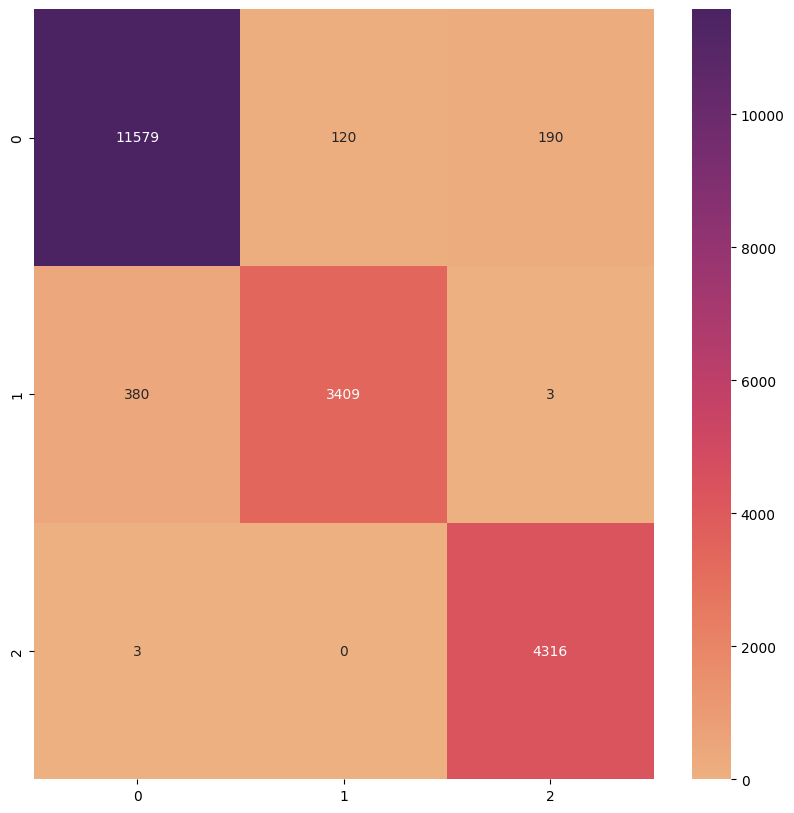

In [56]:
# Heatmap of the confusion matrix
from sklearn.metrics import confusion_matrix

grid_cm = confusion_matrix(y_test, grid.predict(X_test))
plt.figure(figsize=(10,10))
sns.heatmap(grid_cm, annot=True, fmt='d', cmap='flare')

The confusion matrix shows that the model performs very well across all classes, with minimal misclassification. Most of the errors occur in classifying quasars, with some being misclassified as galaxies. This may be due to similarities in features between these two classes or the relatively smaller representation of quasars in the dataset compared to galaxies and stars.

### ROC and AUC

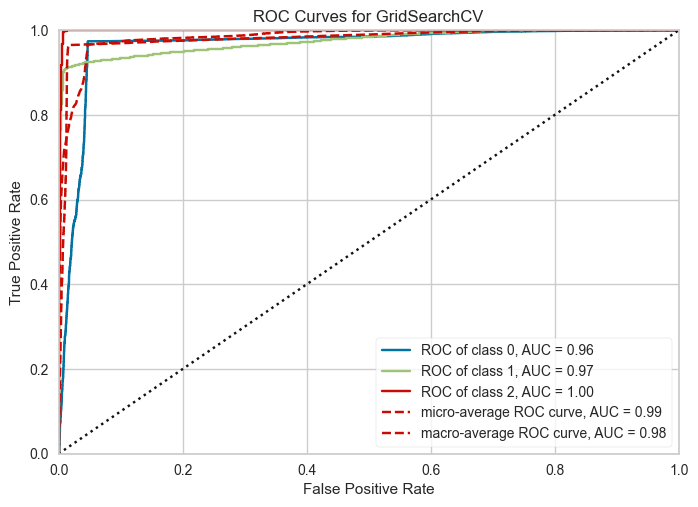

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [57]:
# ROC curve
from yellowbrick.classifier import ROCAUC

roc = ROCAUC(grid, classes=["0", "1", "2"])

roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()



The ROC curves and AUC values indicate that the model performs very well across all classes:

* **Class 0 (Galaxies)**: The ROC curve for galaxies achieves an AUC of **0.96**, reflecting the model’s strong performance in distinguishing galaxies from other classes.
* **Class 1 (Quasars)**: The ROC curve for quasars has an AUC of **0.97**, demonstrating effective classification for this class, despite some overlap with galaxies.
* **Class 2 (Stars)**: The model performs exceptionally well in identifying stars, with an AUC of **1.00**, indicating near-perfect distinction from other classes.

The **micro-average ROC curve** (AUC = 0.99) and **macro-average ROC curve** (AUC = 0.98) further validate the model’s strong classification capabilities across all classes. These high AUC values confirm that the model effectively differentiates between galaxies, quasars, and stars, making it highly reliable for celestial object classification tasks.

This ROC and AUC analysis solidifies the confidence in the model’s robustness and ability to generalize well to unseen data.